In [1]:
import pandas as pd
df=pd.read_csv("/content/fear_greed_index.csv")
df1=pd.read_csv("/content/historical_data.csv")

In [2]:
df.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [3]:
df1.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
df1["date"]=pd.to_datetime(df1["Timestamp IST"],format="%d-%m-%Y %H:%M").dt.date

In [7]:
df1.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')

In [8]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [9]:
merged_df = pd.merge(df1, df, how='left', on='date')

In [10]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'])

In [12]:
daily_stats = merged_df.groupby(['Account', 'date', 'classification']).agg({
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'Fee': 'sum',
    'Execution Price': 'mean',
    'Trade ID': 'count'
}).reset_index()


In [18]:
fear_pnl = merged_df[merged_df['classification'] == "Fear"]['Closed PnL'].dropna()
extreme_fear_pnl = merged_df[merged_df['classification'] == "Extreme Fear"]['Closed PnL'].dropna()
greed_pnl = merged_df[merged_df['classification'] == "Greed"]['Closed PnL'].dropna()


In [19]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    fear_pnl,
    extreme_fear_pnl,
    greed_pnl
)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


F-statistic: 3.48, p-value: 0.0310


/tmp/ipython-input-20-4072280576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


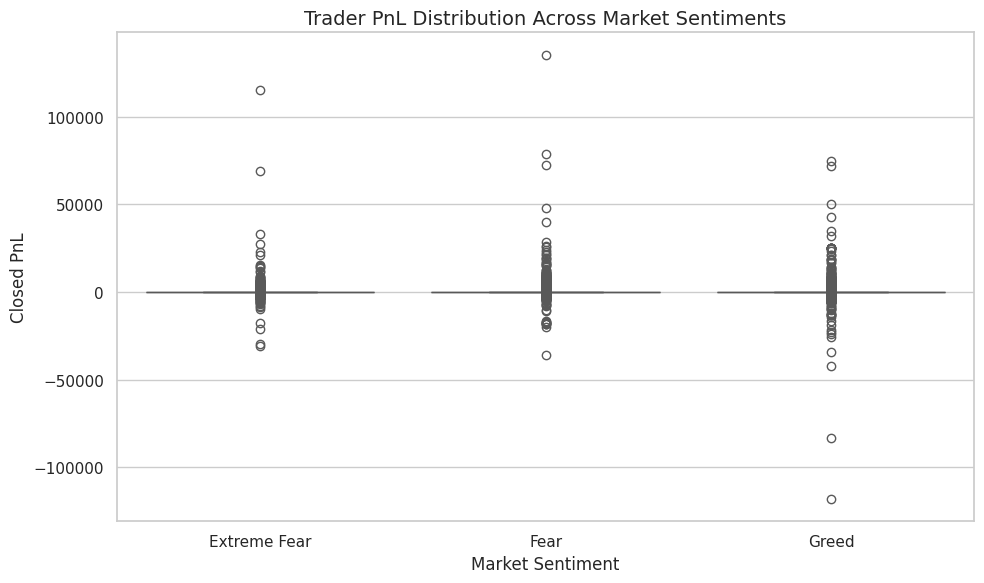

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Draw the boxplot
sns.boxplot(
    data=merged_df,
    x='classification',
    y='Closed PnL',
    order=['Extreme Fear', 'Fear', 'Greed'],  # optional ordering
    palette='Set2'
)

# Add title and labels
plt.title('Trader PnL Distribution Across Market Sentiments', fontsize=14)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Closed PnL', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-21-3223073673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


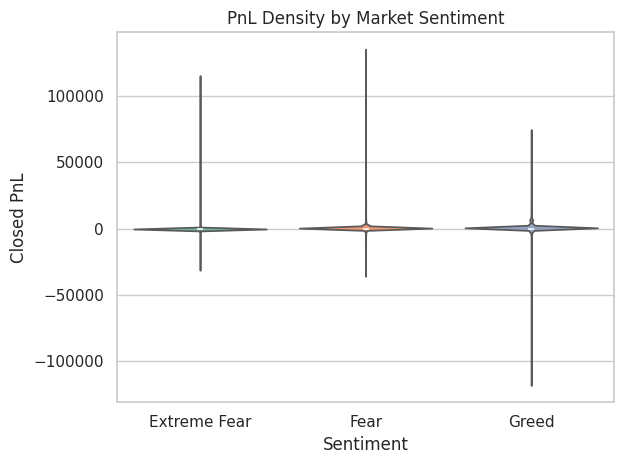

In [21]:
sns.violinplot(
    data=merged_df,
    x='classification',
    y='Closed PnL',
    order=['Extreme Fear', 'Fear', 'Greed'],
    palette='Set2'
)
plt.title('PnL Density by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

In [23]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')

In [31]:
pivot_df = merged_df.pivot_table(
    index='Account',
    columns='classification',
    values='Closed PnL',
    aggfunc='mean'
).add_prefix('avg_PnL_').reset_index()


In [36]:
pivot_df_filled = pivot_df.fillna(0)

In [38]:
pivot_df_filled.isna().sum()

,0
classification,
Account,0
avg_PnL_Extreme Fear,0
avg_PnL_Extreme Greed,0
avg_PnL_Fear,0
avg_PnL_Greed,0
avg_PnL_Neutral,0


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Drop 'Account' before scaling
features = pivot_df_filled.drop('Account', axis=1)

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
pivot_df_filled['cluster'] = kmeans.fit_predict(scaled_features)

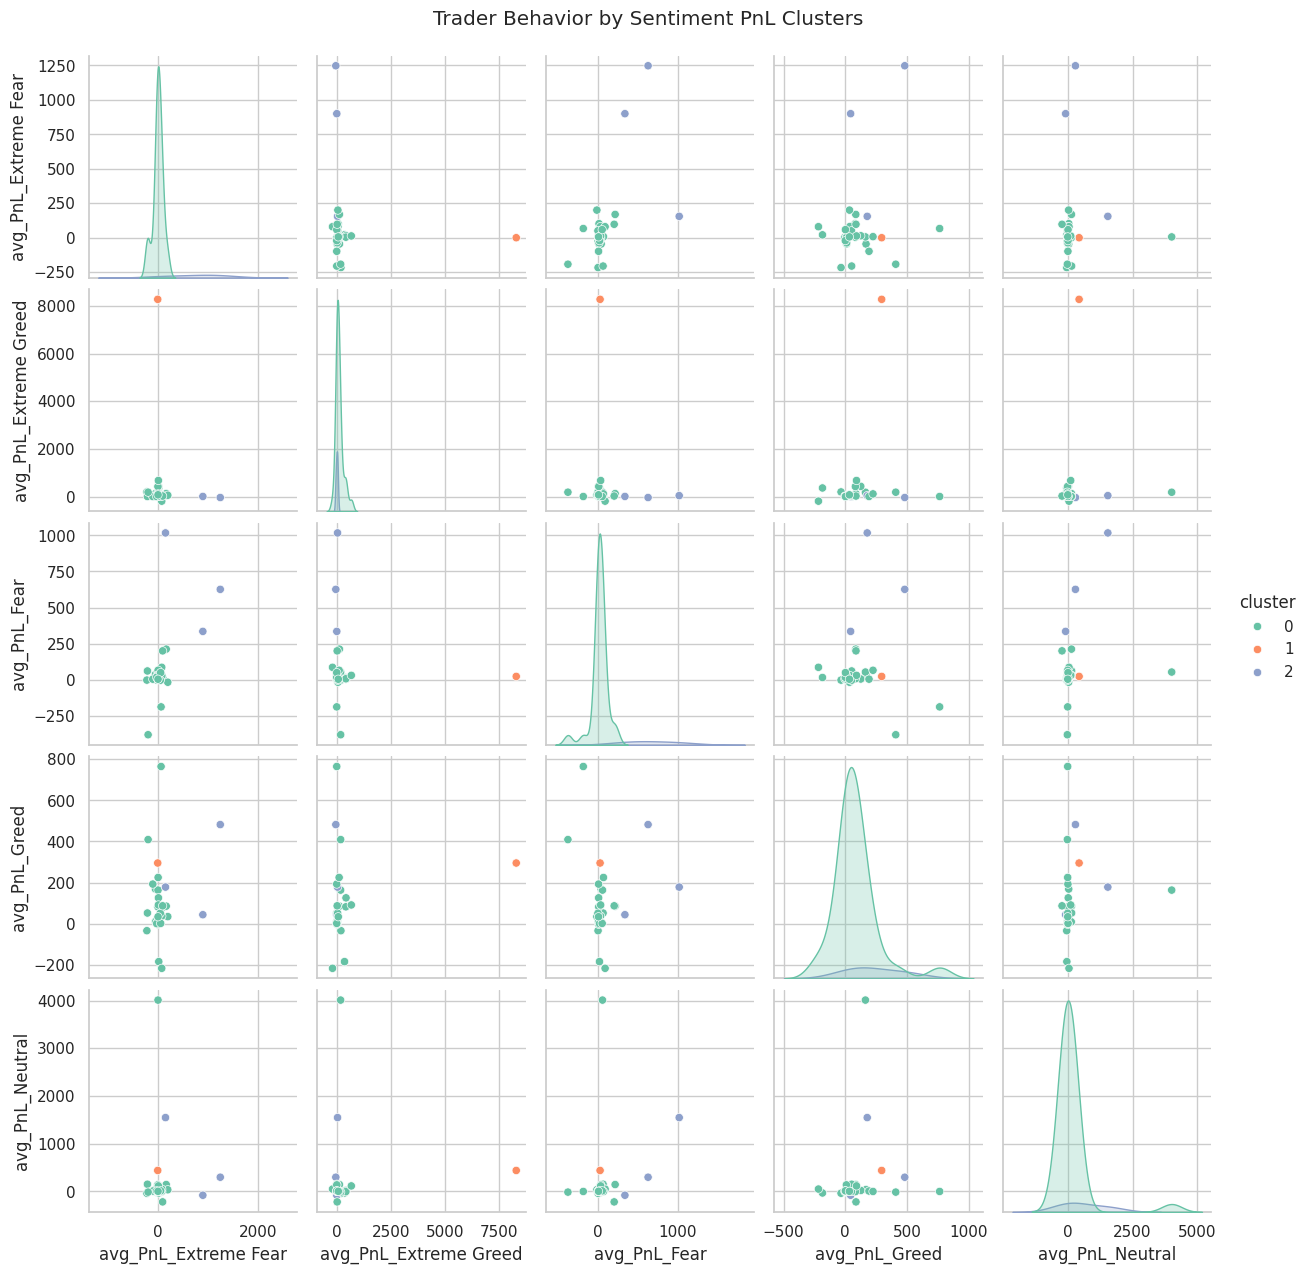

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    pivot_df_filled,
    vars=[col for col in pivot_df_filled.columns if col.startswith('avg_PnL')],
    hue='cluster',
    palette='Set2'
)
plt.suptitle("Trader Behavior by Sentiment PnL Clusters", y=1.02)
plt.show()


In [42]:
# Keep only sentiment-PnL columns and cluster label
sentiment_cols = [col for col in pivot_df_filled.columns if col.startswith('avg_PnL_')]
cluster_profiles = pivot_df_filled.groupby('cluster')[sentiment_cols].mean()

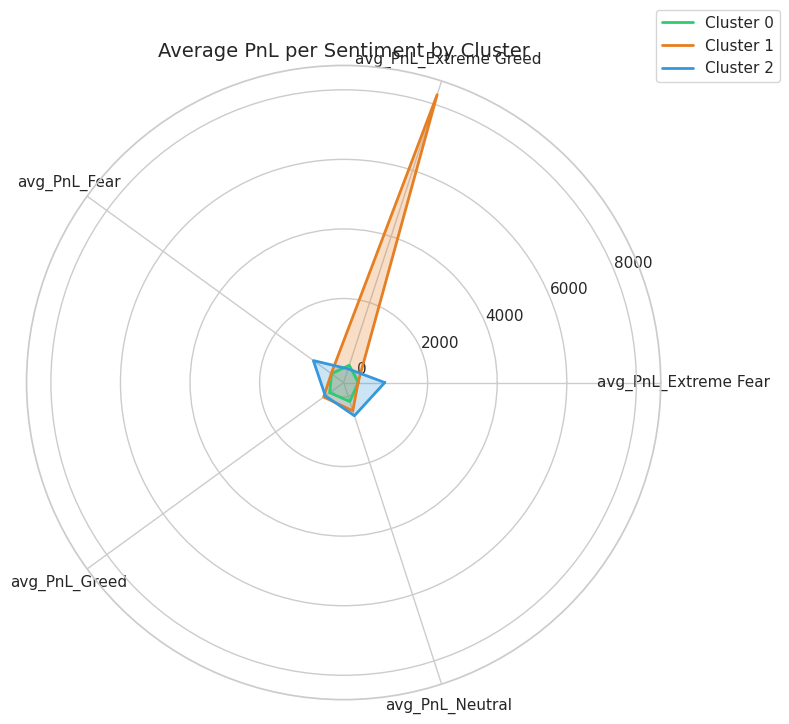

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Setup
labels = cluster_profiles.columns.tolist()
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop
# Style
plt.figure(figsize=(8, 8))
colors = ['#2ECC71', '#E67E22', '#3498DB']  # green, orange, blue

# One plot per cluster
for i, (idx, row) in enumerate(cluster_profiles.iterrows()):
    values = row.tolist()
    values += values[:1]  # close the loop
    plt.polar(angles, values, color=colors[i], linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, color=colors[i], alpha=0.25)

# Labels
plt.xticks(angles[:-1], labels, fontsize=11)
plt.title('Average PnL per Sentiment by Cluster', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()
